In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from helpers import *

In [2]:
df = pd.read_csv("../../data/earnings.csv")

#### Question 1

In [3]:
summary(df, ['s', 'netwin1', 'netwin2'], percentiles=[10, 25, 50, 75, 90])

,s,netwin1,netwin2
mean,-0.034295,0.000546,0.008731
std,6.910801,0.085145,0.340307
min,-1790.209000,-0.890778,-1.071007
10th percentile,-0.005455,-0.083904,-0.316339
25th percentile,-0.000437,-0.033229,-0.152914
50th percentile,0.000331,0.000182,-0.012081
75th percentile,0.001659,0.034908,0.128584
90th percentile,0.004961,0.084568,0.313767
max,7.432727,1.588795,22.972540


#### Question 3

In [4]:
def quantile_groups_statistics(dat):
    dat.loc[dat['sw'] == 0, 'group'] = 6
    dat.loc[dat['sw'] < 0, 'group'] = pd.qcut(df.loc[df['sw'] < 0, 'sw'], 5, labels=False) + 1
    dat.loc[dat['sw'] > 0, 'group'] = pd.qcut(df.loc[df['sw'] > 0, 'sw'], 5, labels=False) + 7
    dat['group'] = dat['group'].astype('int')
    return dat.groupby('group').apply(lambda x: pd.Series(data=[x['sw'].mean(), x['netwin1w'].mean(), x['netwin2w'].mean()], index=['sw', 'netwin1w', 'netwin2w']))

quantile_return_df_by_year = df.groupby('year').apply(quantile_groups_statistics).reset_index()
quantile_return_df = quantile_return_df_by_year.drop('year', axis=1).groupby('group').agg('mean').reset_index()

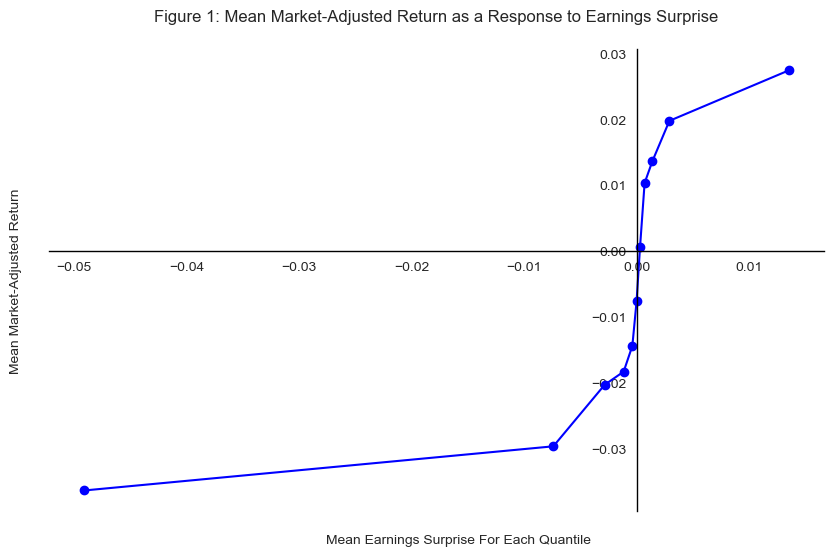

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(quantile_return_df['sw'], quantile_return_df['netwin1w'], marker='o', color='b')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.7, -0.05)
ax.yaxis.set_label_coords(-0.05, 1.)

plt.xlabel("Mean Earnings Surprise For Each Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 1: Mean Market-Adjusted Return as a Response to Earnings Surprise", pad=20)

plt.savefig('fig1.png')

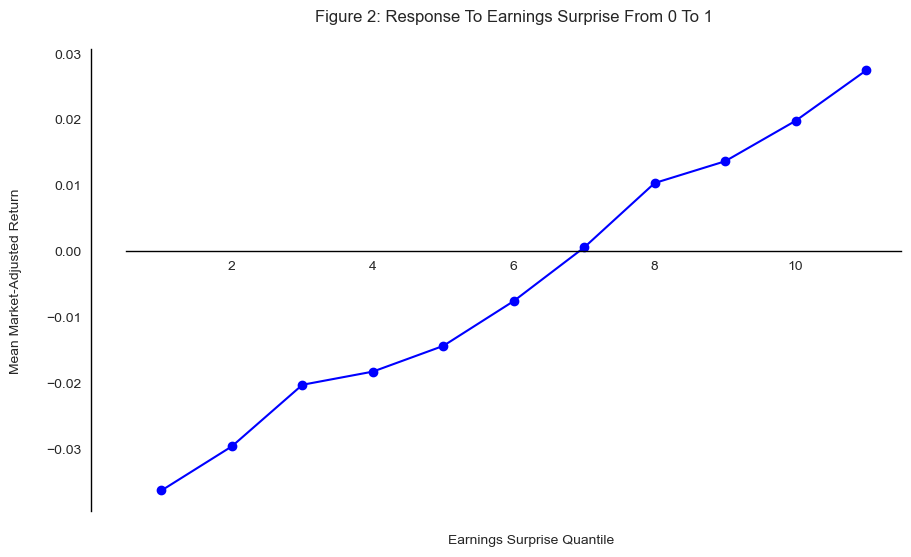

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(quantile_return_df['group'], quantile_return_df['netwin1w'], marker='o', color='b')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.63, -0.05)
ax.yaxis.set_label_coords(-0.15, 1.)

plt.xlabel("Earnings Surprise Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 2: Response To Earnings Surprise From 0 To 1", pad=20)

plt.savefig('fig2.png')

#### Question 6

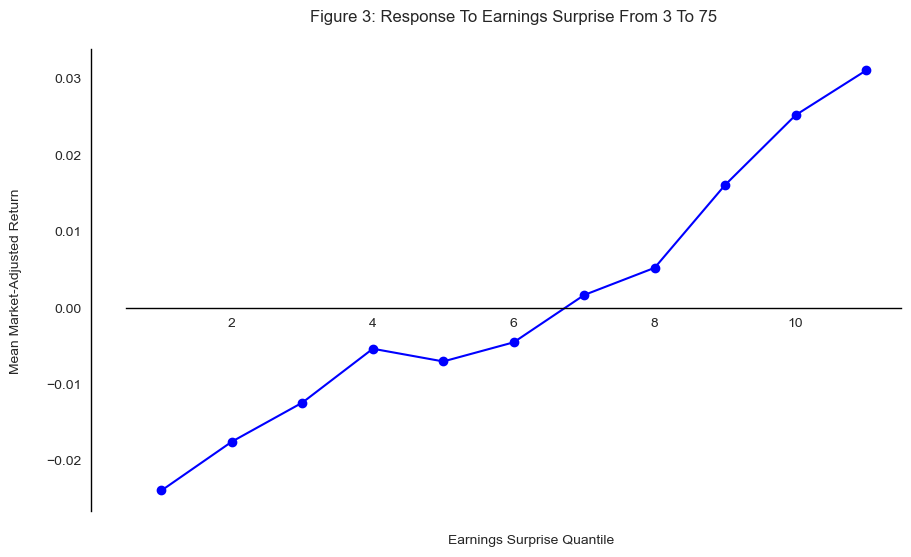

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(quantile_return_df['group'], quantile_return_df['netwin2w'], marker='o', color='b')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.63, -0.05)
ax.yaxis.set_label_coords(-0.15, 1.)

plt.xlabel("Earnings Surprise Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 3: Response To Earnings Surprise From 3 To 75", pad=20)

plt.savefig('fig3.png')

#### Question 7

The efficient market hypothesis (EMH) says that stock prices should imediately reflect all known information. This means that all responses to unexpected earnings should happen right now, and there shouldn't be a pattern in returns afterward. After the earnings report, we wouldn't expect any systematic post-announcement shift in the [3,75] window, no matter how big the earnings surprise was.
However, the plot shows that earnings surprise quantiles and post-announcement drift are related. Higher surprises in earnings are related to higher average returns in the [3,75] window. It seems that the market doesn't fully get information from earnings reports immediately, so prices change slowly.
This result goes against the efficient market theory, showing that markets may take a while to fully get information about earnings.

#### Question 8

In [8]:
drift_by_yea = quantile_return_df_by_year.groupby('year').apply(lambda x: pd.Series(
    data=[x.loc[x['group'] == 1, 'netwin2w'].values[0], x.loc[x['group'] == 10, 'netwin2w'].values[0]], 
    index=['lowest quantile return', 'highest quantile return'])).reset_index()
drift_by_yea['difference'] = drift_by_yea["highest quantile return"] - drift_by_yea["lowest quantile return"]

t_stat, p_value = stats.ttest_rel(drift_by_yea["lowest quantile return"], drift_by_yea["highest quantile return"])

#### Question 9

In [9]:
df['datetime'] = pd.to_datetime(df['date'], format='%d%b%Y')
df['friday_flag'] = df['datetime'].dt.dayofweek == 4  # 1 for friday

In [10]:
quantile_return_df_by_year_flag = df.groupby(['year', 'friday_flag']).apply(quantile_groups_statistics).reset_index()
quantile_return_df_by_flag = quantile_return_df_by_year_flag.drop('year', axis=1).groupby(['group', 'friday_flag']).agg('mean').reset_index()

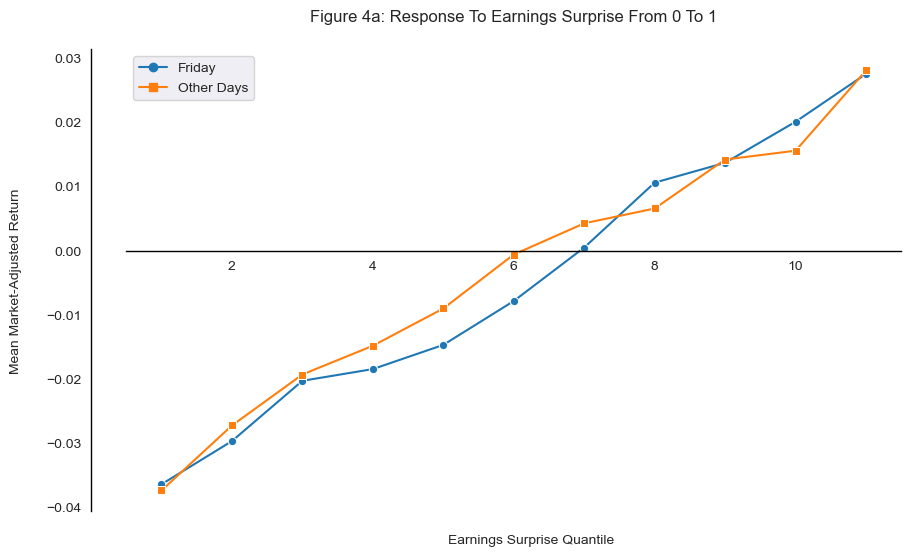

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=quantile_return_df_by_flag, x='group', y='netwin1w', hue='friday_flag', 
             hue_order=['Friday', 'Other Days'], style_order=['Friday', 'Other Days'],
             style='friday_flag', markers=["o", "s"], dashes=False)
sns.lineplot(data=quantile_return_df_by_flag, x='group', y='netwin1w', hue='friday_flag', 
             style='friday_flag', markers=["o", "s"], dashes=False)

plt.legend(title=None, labels=['Friday', 'Other Days'], frameon=True, loc='upper left')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.63, -0.05)
ax.yaxis.set_label_coords(-0.15, 1.)

plt.xlabel("Earnings Surprise Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 4a: Response To Earnings Surprise From 0 To 1", pad=20)

plt.savefig('fig4a.png')

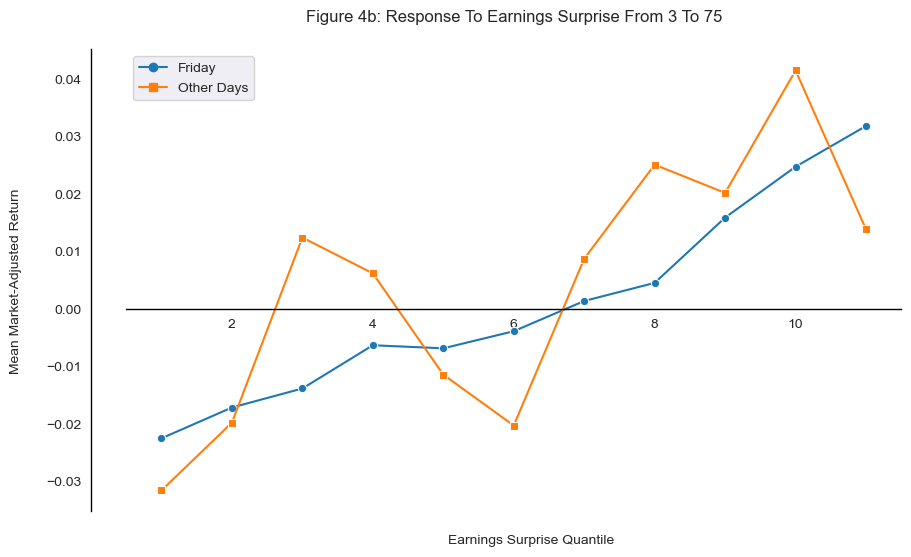

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=quantile_return_df_by_flag, x='group', y='netwin2w', hue='friday_flag', 
             hue_order=['Friday', 'Other Days'], style_order=['Friday', 'Other Days'],
             style='friday_flag', markers=["o", "s"], dashes=False)
sns.lineplot(data=quantile_return_df_by_flag, x='group', y='netwin2w', hue='friday_flag', 
             style='friday_flag', markers=["o", "s"], dashes=False)

plt.legend(title=None, labels=['Friday', 'Other Days'], frameon=True, loc='upper left')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.63, -0.05)
ax.yaxis.set_label_coords(-0.15, 1.)

plt.xlabel("Earnings Surprise Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 4b: Response To Earnings Surprise From 3 To 75", pad=20)

plt.savefig('fig4b.png')

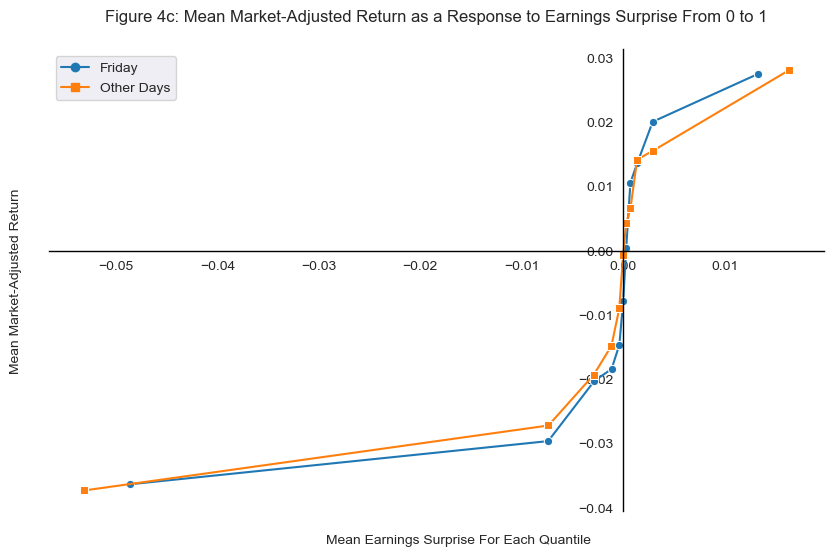

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=quantile_return_df_by_flag, x='sw', y='netwin1w', hue='friday_flag', 
             hue_order=['Friday', 'Other Days'], style_order=['Friday', 'Other Days'],
             style='friday_flag', markers=["o", "s"], dashes=False)
sns.lineplot(data=quantile_return_df_by_flag, x='sw', y='netwin1w', hue='friday_flag', 
             style='friday_flag', markers=["o", "s"], dashes=False)

plt.legend(title=None, labels=['Friday', 'Other Days'], frameon=True, loc='upper left')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.7, -0.05)
ax.yaxis.set_label_coords(-0.05, 1.)

plt.xlabel("Mean Earnings Surprise For Each Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 4c: Mean Market-Adjusted Return as a Response to Earnings Surprise From 0 to 1", pad=20)

plt.savefig('fig4c.png')

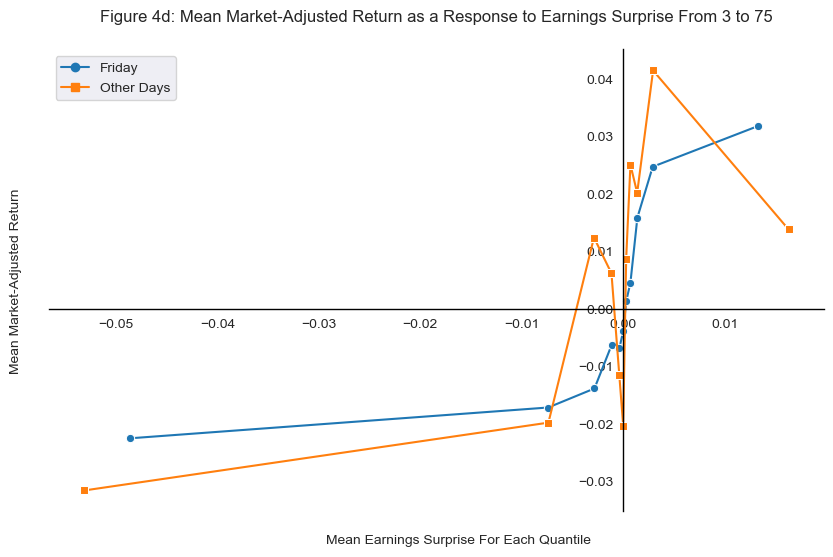

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=quantile_return_df_by_flag, x='sw', y='netwin2w', hue='friday_flag', 
             hue_order=['Friday', 'Other Days'], style_order=['Friday', 'Other Days'],
             style='friday_flag', markers=["o", "s"], dashes=False)
sns.lineplot(data=quantile_return_df_by_flag, x='sw', y='netwin2w', hue='friday_flag', 
             style='friday_flag', markers=["o", "s"], dashes=False)

plt.legend(title=None, labels=['Friday', 'Other Days'], frameon=True, loc='upper left')

ax = plt.gca()
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.xaxis.set_label_coords(.7, -0.05)
ax.yaxis.set_label_coords(-0.05, 1.)

plt.xlabel("Mean Earnings Surprise For Each Quantile", ha='right')
plt.ylabel("Mean Market-Adjusted Return", va='top')
plt.title("Figure 4d: Mean Market-Adjusted Return as a Response to Earnings Surprise From 3 to 75", pad=20)

plt.savefig('fig4d.png')

#### Question 10

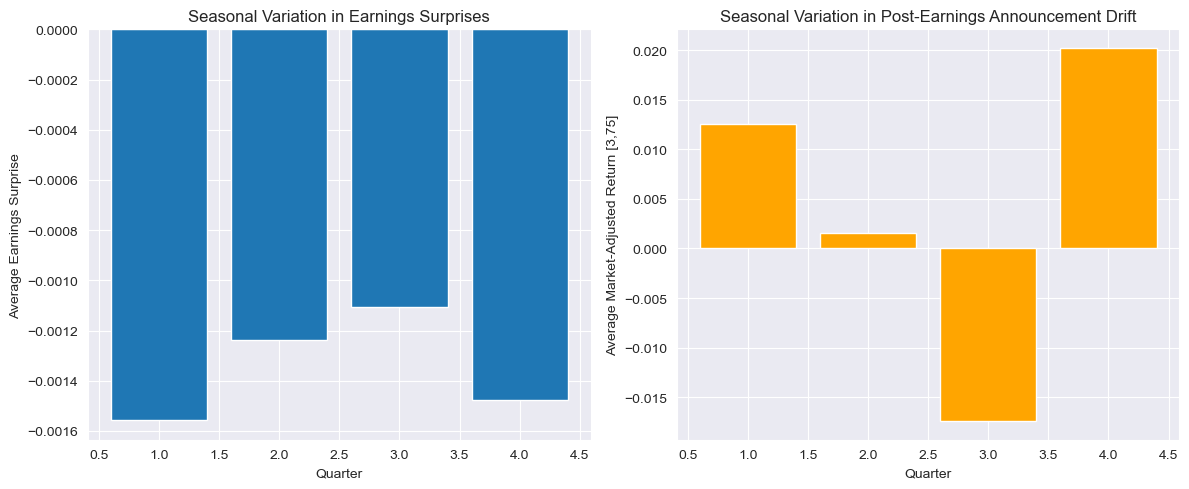

Average Drift for Friday Announcements: -0.005491251412002016
Average Drift for Other Days Announcements: 0.004950440998382615
Average Drift for Positive Surprises: 0.017868695629860442
Average Surprises for Positive Surprises: 0.003839275371160745
Average Drift for Negative Surprises: -0.01772369917603773
Average Surprises for Negative Surprises: -0.012317345314815773


In [18]:
df['quarter'] = pd.to_datetime(df['date']).dt.quarter
seasonal_surprise = df.groupby('quarter')['sw'].mean()
seasonal_returns = df.groupby('quarter')['netwin2w'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(seasonal_surprise.index, seasonal_surprise.values)
plt.xlabel('Quarter')
plt.ylabel('Average Earnings Surprise')
plt.title('Seasonal Variation in Earnings Surprises')

plt.subplot(1, 2, 2)
plt.bar(seasonal_returns.index, seasonal_returns.values, color='orange')
plt.xlabel('Quarter')
plt.ylabel('Average Market-Adjusted Return [3,75]')
plt.title('Seasonal Variation in Post-Earnings Announcement Drift')
plt.tight_layout()
plt.show()

df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
friday_drift = df.loc[df['day_of_week'] == 4, 'netwin2w'].mean()
other_days_drift = df.loc[df['day_of_week'] != 4, 'netwin2w'].mean()

print("Average Drift for Friday Announcements:", friday_drift)
print("Average Drift for Other Days Announcements:", other_days_drift)

positive_drift = df.loc[df['sw'] > 0, 'netwin2w'].mean()
positive_surprise = df.loc[df['sw'] > 0, 'sw'].mean()
negative_drift = df.loc[df['sw'] < 0, 'netwin2w'].mean()
negative_surprise = df.loc[df['sw'] < 0, 'sw'].mean()

print("Average Drift for Positive Surprises:", positive_drift)
print("Average Surprises for Positive Surprises:", positive_surprise)
print("Average Drift for Negative Surprises:", negative_drift)
print("Average Surprises for Negative Surprises:", negative_surprise)

For Seasonal Variation in Post-Earnings Announcement Drift, Q3 shows the lowest average earnings surprise, while Q4 is the highest. This shows that investors reacts differently based on different quarters, which means that getting the information from one quarter to another may not be efficient.

We can also see that the average drift for announcement made on Friday is negative while others days are positive. This is also the same as an investor theory that the investors always pay less attention to informations released on Friday, which may cause a slower incorporation in prices.

Average Drift for Positive Surprises is 0.01787 and Negative Surprises is -0.01772, which is also the same as a theory that investors tend to overreact to bad news.

